# Prevendo consumo de energia

Dados de consumo de energia e de temperatura e humidade em vários pontos de uma casa.

Referência:
Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788, [Web Link].

Vamos tentar prever o consumo de energia de uma casa de hora em hora.

# Entendendo os dados

Descrição:
- **Tx** é a temperatura no cômodo x (1:cozinha, 2:sala de estar, 3:"laundry", 4:escritório, 5:banheiro, 6:lado de fora, 7:"ironing", 8:quarto de adolescente, 9:quarto dos pais)
- **RH_x** é a humidade no cômodo x.
- **To, Pressure, RH_out, Windspeed, Visibility, Tdewpoint** são informações da região medida por um centro meteorológico.
- **Appliances** é a energia total gasta em Wh (Watts-hora)
- **lights** é a energia gasta pelas lâmpadas em Wh (Watts-hora)
- date é o timestamp em "ano-mês-dia hora:minuto:segundo"


Obs:
Essas medidas foram feitas na Bélgica.

Faça uma exploração dos primeiros pontos disponíveis.

- Qual é a frequência das medidas?
- Qual valor máximo e mínimo em cada medida?

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/energydata_complete.csv',infer_datetime_format=True)

In [5]:
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
6*24

144

In [7]:
19735/144

137.04861111111111

In [8]:
df[:144*30].describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,99.671296,5.601852,20.563726,43.065877,19.766913,42.102502,20.657950,43.190717,19.036003,43.381081,...,17.309875,45.320044,5.214132,756.731030,86.134144,5.398843,39.424190,2.969074,24.684633,24.684633
std,118.320552,9.512731,1.589758,3.048251,1.658185,2.659933,1.514605,2.274761,1.614113,3.555921,...,1.109025,3.980767,4.106595,8.716475,9.095031,2.809957,12.542087,4.143500,14.730903,14.730903
min,10.000000,0.000000,16.790000,32.023333,16.100000,30.160000,17.200000,35.030000,15.100000,35.090000,...,14.890000,34.730000,-5.000000,729.300000,51.000000,0.000000,2.000000,-6.600000,0.028526,0.028526
25%,40.000000,0.000000,19.290000,41.120000,18.500000,40.290000,19.700000,41.826667,18.100000,40.966667,...,16.566667,42.500000,2.866667,752.695833,81.166667,3.000000,29.000000,0.700000,11.978956,11.978956
50%,50.000000,0.000000,20.790000,43.400000,20.000000,42.500000,20.533333,43.730000,19.100000,43.560000,...,17.100000,46.051250,5.600000,758.827778,88.500000,5.000000,40.000000,3.400000,24.061472,24.061472
75%,100.000000,10.000000,21.790000,45.124167,21.000000,44.000000,21.790000,44.790000,20.200000,46.290000,...,18.290000,48.658333,8.533333,763.600000,93.000000,7.500000,42.000000,6.266667,37.909154,37.909154
max,1080.000000,70.000000,24.100000,63.360000,23.600000,50.260000,25.500000,50.163333,23.000000,51.090000,...,19.290000,53.326667,13.100000,770.700000,100.000000,14.000000,65.000000,10.700000,49.996530,49.996530


In [9]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df.set_index('date', inplace=True)

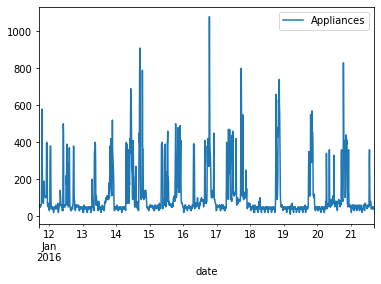

In [11]:
df[:144*10].plot.line(y='Appliances')

# Preparar os dados


- Agregue variáveis em uma frequência de tempo escolhida.
- Junte os dados como X e y (lembrando que para RNN, cada valor de X vai ser uma sequência)
- Separe os dados entre treino, validação e teste 

Minhas hipóteses:
- 10 em 10 minutos é exagerado. Em geral as pessoas tomam ações que afetam o gasto de energia de hora em hora.
- A temperatura dentro da casa é função direta da temperatura de fora (depende de isolamentos, etc...).
- Mesma coisa com a humidade.
- A temperatura dentro da casa, junto da humidade, assim como a velocidade do vento fora da casa, afetam a sensação térmica.
- A hora do dia afeta tanto a temperatura quanto a luminosidade. Poderíamos usar a visibilidade, invés da hora do dia, mas a visibilidade é mais difícil de prever o futuro.

In [12]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00+00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00+00:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00+00:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00+00:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00+00:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [13]:
df_hour = df.resample('1H').agg({'T_out':'mean',
                                 'RH_out':'mean',
                                 'Windspeed':'mean',
                                 'Appliances':'sum'})

In [14]:
df_hour.head()

,T_out,RH_out,Windspeed,Appliances
date,,,,
2016-01-11 17:00:00+00:00,6.308333,92.000000,6.166667,330
2016-01-11 18:00:00+00:00,5.941667,91.583333,5.416667,1060
2016-01-11 19:00:00+00:00,6.000000,89.750000,6.000000,1040
2016-01-11 20:00:00+00:00,6.000000,87.583333,6.000000,750
2016-01-11 21:00:00+00:00,5.833333,87.416667,6.000000,620


In [18]:
df_hour['hour'] = df_hour.index.hour

- Normalizar
- Dias que eu quero, e o y junto

In [20]:
variaveis = ['hour', 'T_out', 'RH_out', 'Windspeed']
target = 'Appliances'
T = 3
X = []
y = []
for t in range(df_hour.shape[0] - T):
    start_time = df_hour.index[t]
    end_time = start_time + pd.offsets.Hour(T-1)
    pred_time = end_time + pd.offsets.Hour(1)
    
    x_vars = df_hour.loc[start_time:end_time, variaveis].values
    y_vars = df_hour.loc[pred_time, target]
    
    X.append(x_vars)
    y.append(y_vars)
    
X = np.array(X)
y = np.array(y)

In [21]:
X[0]

array([[17.        ,  6.30833333, 92.        ,  6.16666667],
       [18.        ,  5.94166667, 91.58333333,  5.41666667],
       [19.        ,  6.        , 89.75      ,  6.        ]])

In [22]:
y[0]

750

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
train_test_split([1, 2, 3, 4, 5, 6, 7, 8], test_size=2, shuffle=False)

[[1, 2, 3, 4, 5, 6], [7, 8]]

In [24]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                              test_size=0.2,
                                                              shuffle=False)

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.2,
                                                      shuffle=False)

In [31]:
X_max = X_train.max(axis=(0,1))
X_min = X_train.min(axis=(0,1))

X_train = (X_train - X_min)/(X_max - X_min)
X_valid = (X_valid - X_min)/(X_max - X_min)
X_test = (X_test - X_min)/(X_max - X_min)

In [32]:
X_train.shape

(2103, 3, 4)

In [33]:
X_train[0]

array([[0.73913043, 0.46918006, 0.85343511, 0.45695364],
       [0.7826087 , 0.45391465, 0.84580153, 0.39735099],
       [0.82608696, 0.45634324, 0.81221374, 0.44370861]])

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Algoritmo de previsão

Vamos usar a LSTM para previsão 1 período de tempo à frente.

- Defina o modelo LSTM.
- Use otimizador Adam, e perda "mean_absolute_error"
- Fique a vontade para escolher usar ou não EarlyStopping
- Quão bom ficou o modelo?

In [35]:
shape_de_entrada = [X_train.shape[1], X_train.shape[2]]

(3,4)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(20, activation="relu",
                         return_sequences=True, input_shape=shape_de_entrada),
    tf.keras.layers.Dense(1, activation="relu")
])

True -> [1, 2, 3]

False -> 3

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                2000      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="adam", loss="mean_absolute_error")

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 1,
                           patience=3,
                           verbose=1, mode='auto')

In [41]:
historico = model.fit(X_train, y_train,
                      validation_data=(X_valid, y_valid),
                      epochs=50,
                      batch_size=1,
                      callbacks=[early_stop])

Epoch 1/50
2103/2103 [==============================] - 8s 4ms/step - loss: 371.1368 - val_loss: 268.9710
Epoch 2/50
2103/2103 [==============================] - 7s 3ms/step - loss: 307.9117 - val_loss: 266.8313
Epoch 3/50
2103/2103 [==============================] - 7s 3ms/step - loss: 306.9015 - val_loss: 267.2703
Epoch 4/50
2103/2103 [==============================] - 7s 3ms/step - loss: 305.7324 - val_loss: 263.2891
Epoch 5/50
2103/2103 [==============================] - 7s 3ms/step - loss: 304.5808 - val_loss: 267.5581
Epoch 6/50
2103/2103 [==============================] - 7s 3ms/step - loss: 302.6107 - val_loss: 259.9084
Epoch 7/50
2103/2103 [==============================] - 7s 3ms/step - loss: 299.6249 - val_loss: 256.3717
Epoch 8/50
2103/2103 [==============================] - 7s 3ms/step - loss: 296.1435 - val_loss: 253.6088
Epoch 9/50
2103/2103 [==============================] - 7s 4ms/step - loss: 291.5454 - val_loss: 252.8589
Epoch 10/50
2103/2103 [=======================

In [42]:
model.evaluate(X_valid, y_valid)

17/17 [==============================] - 0s 4ms/step - loss: 253.8315


253.83154296875

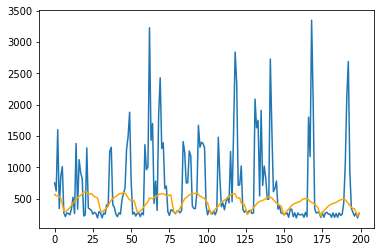

In [45]:
y_pred = model.predict(X_train)

plt.plot(y_train[:200])
plt.plot(y_pred[:200], '-', color='Orange')

In [46]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 0s 3ms/step - loss: 247.8555


247.85549926757812

In [47]:
X_nao_visto = [[12., 4., 84., 6.],
               [ 1., 4., 85., 6.],
               [ 2., 3., 88., 7.]]

X_nao_visto = np.array(X_nao_visto)

In [50]:
x_a_prever = (X_nao_visto - X_min)/(X_max - X_min)

In [57]:
x_a_prever[np.newaxis, :, :].shape

(1, 3, 4)

In [60]:
x_a_prever

array([[0.52173913, 0.37307737, 0.70687023, 0.44370861],
       [0.04347826, 0.37307737, 0.72519084, 0.44370861],
       [0.08695652, 0.33144443, 0.78015267, 0.52317881]])

In [59]:
x_a_prever[np.newaxis, :, :]

array([[[0.52173913, 0.37307737, 0.70687023, 0.44370861],
        [0.04347826, 0.37307737, 0.72519084, 0.44370861],
        [0.08695652, 0.33144443, 0.78015267, 0.52317881]]])

In [58]:
model.predict(x_a_prever[np.newaxis, :, :])

array([[380.8079]], dtype=float32)